## **Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
x = np.arange(-10,11)
y = sigmoid(x)

In [ ]:
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [ ]:
y

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01,
       9.99954602e-01])

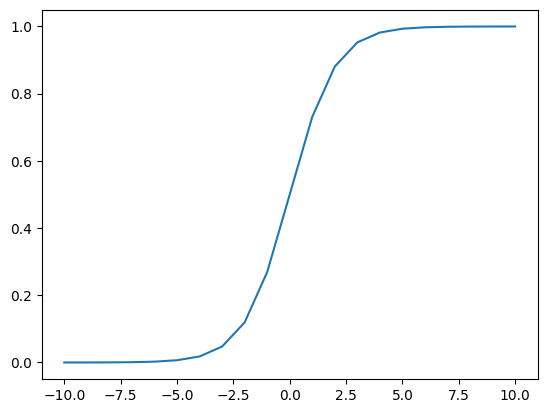

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
#Connecting to dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Using insurance dataset
df=pd.read_csv('/content/drive/MyDrive/Data Science_NG/Colab Notebooks/Datasets/salary.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,1
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  Income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


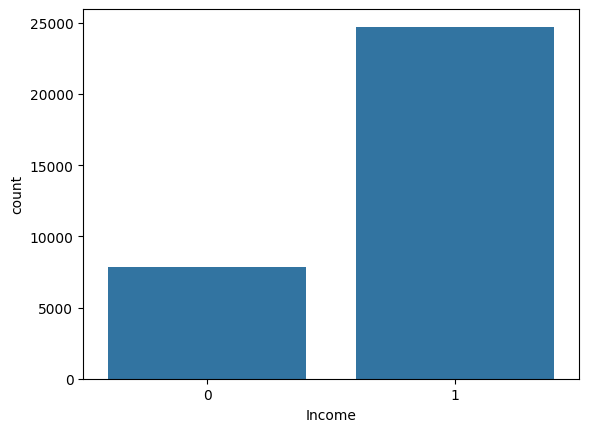

In [ ]:
plt.figure()
sns.countplot(data=df,x="Income")
plt.show()

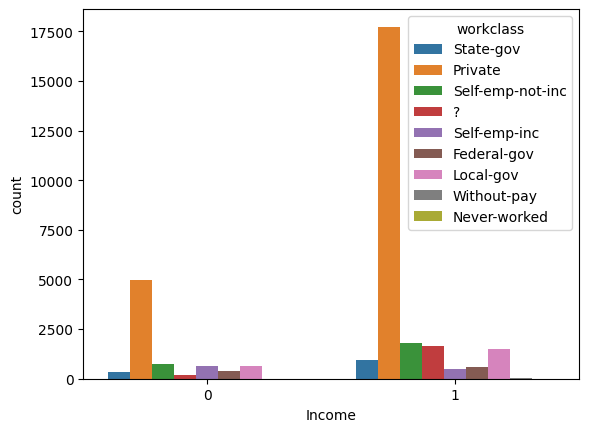

In [ ]:
plt.figure()
sns.countplot(data=df,x="Income",hue="workclass")
plt.show()

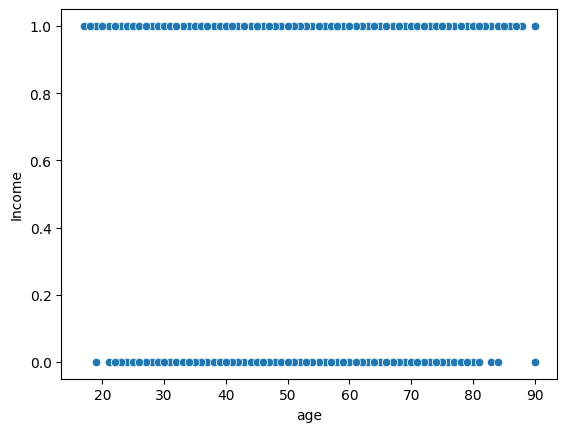

In [ ]:
plt.figure()
sns.scatterplot(data=df, x="age", y="Income")
plt.show()

In [ ]:
df_cat1 = df.select_dtypes(["object"])
df_cat1

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States


In [ ]:
df_num1 = df.select_dtypes(["int64"])
df_num1

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,Income
0,90,77053,9,0,4356,40,1
1,82,132870,9,0,4356,18,1
2,66,186061,10,0,4356,40,1
3,54,140359,4,0,3900,40,1
4,41,264663,10,0,3900,40,1
...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,1
32557,27,257302,12,0,0,38,1
32558,40,154374,9,0,0,40,0
32559,58,151910,9,0,0,40,1


In [ ]:
#Using Label Encoder for naming objects as 1,2,3,4 etc
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in df_cat1:
    le = LabelEncoder()
    df_cat1[col] = le.fit_transform(df_cat1[col])

In [ ]:
df_cat1.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,0,11,6,0,1,4,0,39
1,4,11,6,4,1,4,0,39
2,0,15,6,0,4,2,0,39
3,4,5,0,7,4,4,0,39
4,4,15,5,10,3,4,0,39


In [ ]:
#The whole dataset is numeric now
df_new1 = pd.concat([df_cat1,df_num1],axis=1)
df_new1

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,Income
0,0,11,6,0,1,4,0,39,90,77053,9,0,4356,40,1
1,4,11,6,4,1,4,0,39,82,132870,9,0,4356,18,1
2,0,15,6,0,4,2,0,39,66,186061,10,0,4356,40,1
3,4,5,0,7,4,4,0,39,54,140359,4,0,3900,40,1
4,4,15,5,10,3,4,0,39,41,264663,10,0,3900,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,4,15,4,11,1,4,1,39,22,310152,10,0,0,40,1
32557,4,7,2,13,5,4,0,39,27,257302,12,0,0,38,1
32558,4,11,2,7,0,4,1,39,40,154374,9,0,0,40,0
32559,4,11,6,1,4,4,0,39,58,151910,9,0,0,40,1


In [ ]:
X = df_new1.iloc[:,:-1]
y = df_new1.iloc[:,-1]

In [ ]:
#Training the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# **Building Baseline Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
log.score(X_train,y_train)

0.7871621621621622

In [ ]:
#Checking accuracy of the trained model
log.score(X_test,y_test)

0.7896407001740199

# **Evaluation matrix**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
accuracy_score(y_test,y_pred)

0.7896407001740199

In [ ]:
precision_score(y_test,y_pred)

0.8070033514388073

In [ ]:
recall_score(y_test,y_pred)

0.9477470141150923

In [ ]:
f1_score(y_test,y_pred)

0.8717308532551027

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.30      0.42      2401
           1       0.81      0.95      0.87      7368

    accuracy                           0.79      9769
   macro avg       0.73      0.63      0.64      9769
weighted avg       0.77      0.79      0.76      9769



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tp,fp)
print(fn,tn)

6983 1670
385 731


# **The END!**